In [1]:
import numpy as np
import torch
import sys
import os
sys.path.append('../')
# from utils.util import *
from model import *
import matplotlib.pyplot as plt
from matplotlib import rcParams

configs = {
    "font.size": 15
}

rcParams.update(configs)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def load_source(source):
    x_list = []
    y_list = []
    
    for i in source:
        x =np.load(f'../dataset/A{i:003}/x.npy')
        y =np.load(f'../dataset/A{i:003}/y.npy')
        x_list.append(x)
        y_list.append(y)

    x = np.concatenate(x_list, axis=0)
    y = np.concatenate(y_list, axis=0)
    
    # x = x[:, :, 768: 1536, 256:]
    x = x / 255.0
        
    return x, y

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

idx = 3
fea_len = 8


# load model
model = AutoEncoder().to(device)
model.load_state_dict(torch.load(f"../save_model/{idx}/best_model.pth"))

train_source = [idx]
val_source = [idx]
test_source = [idx]

# load data
test_x, test_y = load_source(train_source)

new_indices = np.argsort(test_y)
test_x = test_x[new_indices]
test_y = test_y[new_indices]

# get the data
inputs, labels = torch.tensor(test_x, dtype=torch.float32).to(device), torch.tensor(test_y, dtype=torch.float32).to(device)

# get the prediction
outputs = model.encoder_layer(inputs)

data = outputs.cpu().detach().numpy().squeeze()
x = labels.cpu().detach().numpy().squeeze()

print('data:', data.shape, 'labels:', x.shape)

data: (64, 8) labels: (64,)


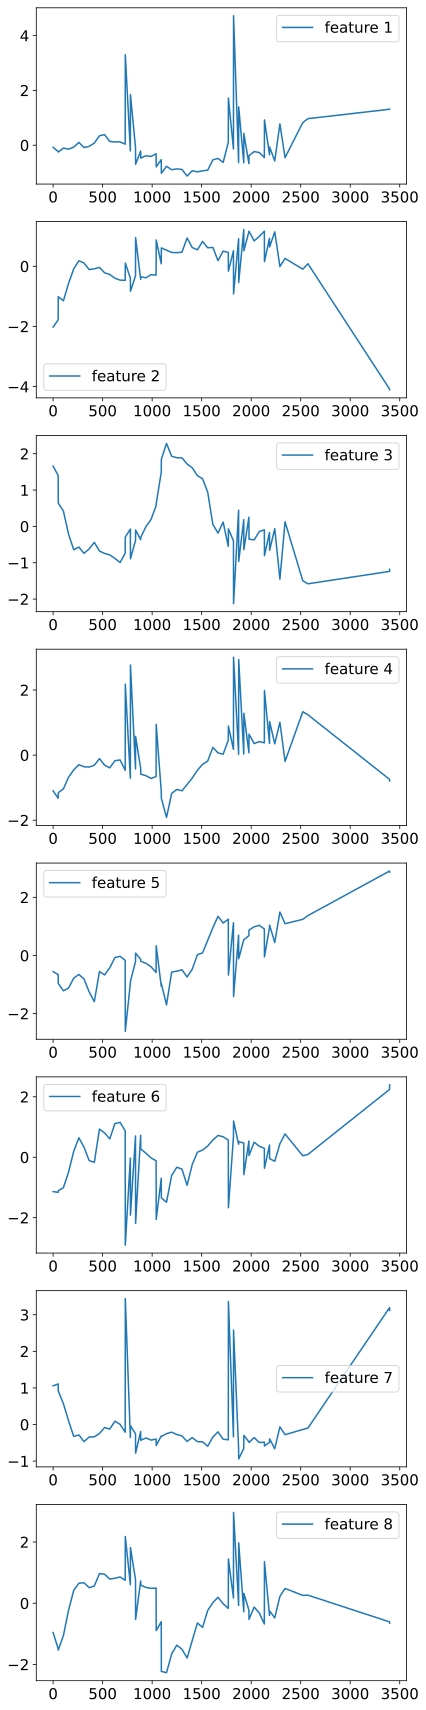

In [3]:
# plot the results
# x = x[:55]
# data = data[:55]

fig, axes = plt.subplots(fea_len, 1, figsize=(6, fea_len*3))
for i in range(fea_len):
        axes[i].plot(x, data[:, i], label=f'feature {i + 1}')
        axes[i].legend()

os.makedirs('./fig/fea', exist_ok=True)
plt.savefig(f'./fig/fea/feature_map_{idx}.jpg')
plt.tight_layout()
plt.show()

In [4]:
# source_list = [3, 9, 11, 12, 13, 14, 20, 25]
# # source_list = [13]

# for idx in source_list:
#     if idx != 13:
#         model.load_state_dict(torch.load(f"../save_model/{idx}/last_model.pth"))
#         test_x, test_y = load_source([idx])
#         sorted_indices = np.argsort(test_y)
#         test_x = test_x[sorted_indices]
#         test_y = test_y[sorted_indices]
#         inputs, labels = torch.tensor(test_x, dtype=torch.float32).to(device), torch.tensor(test_y, dtype=torch.float32).to(device)
#         outputs = model.encoder_layer(inputs)
#         data = outputs.cpu().detach().numpy().squeeze()
#         x = labels.cpu().detach().numpy().squeeze()
#         fig, axes = plt.subplots(fea_len, 1, figsize=(6, fea_len*3))
#         for i in range(fea_len):
#             axes[i].plot(x, data[:, i], label=f'feature {i + 1}')
#             axes[i].legend()
#         plt.savefig(f'./fig/fea/feature_map_{idx}.jpg')
#         print(f'figure {idx} saved~')
#     else:
#         model.load_state_dict(torch.load(f"../save_model/{idx}/last_model.pth"))
#         test_x, test_y = load_source([idx])
#         sorted_indices = np.argsort(test_y)
#         test_x = test_x[sorted_indices]
#         test_y = test_y[sorted_indices]
#         test_x, test_y = test_x[:50], test_y[:50]
#         inputs, labels = torch.tensor(test_x, dtype=torch.float32).to(device), torch.tensor(test_y, dtype=torch.float32).to(device)
#         outputs = model.encoder_layer(inputs)
#         data = outputs.cpu().detach().numpy().squeeze()
#         x = labels.cpu().detach().numpy().squeeze()
#         fig, axes = plt.subplots(fea_len, 1, figsize=(6, fea_len*3))
#         for i in range(fea_len):
#             axes[i].plot(x, data[:, i], label=f'feature {i + 1}')
#             axes[i].legend()
#         plt.savefig(f'./fig/fea/feature_map_{idx}.jpg')
#         print(f'figure {idx} saved~')
